In [14]:
import matplotlib.pyplot as plt
import numpy as np
import reader

In [2]:
kitti = reader.KittiReader()

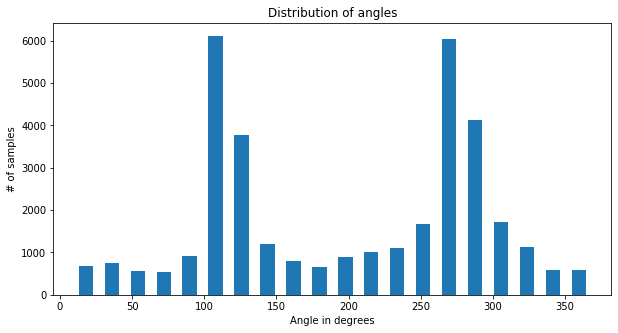

In [59]:
# Plot distribution of angles
angles = list(map(lambda record: record['alpha'], kitti.image_data))
plt.figure(figsize = (10, 5))
plt.title("Distribution of angles")
hist, bins = np.histogram(angles, bins = 20)
plt.bar(bins[1:] * 180 / np.pi, hist, width = 10)
plt.xlabel("Angle in degrees")
plt.ylabel("# of samples")
plt.show()

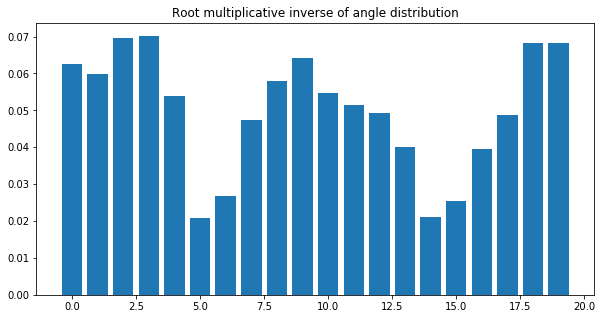

In [62]:
# Plot root multiplicative inverse of distribution which could be a sampling ditribution for the bins
angles = list(map(lambda record: record['alpha'], kitti.image_data))
hist, bins = np.histogram(angles, bins = 20)
inverse = np.sqrt(1 / (hist / sum(hist)))
norm_inverse = inverse / sum(inverse)
plt.figure(figsize = (10, 5))
plt.title("Root multiplicative inverse of angle distribution")
plt.bar(range(len(hist)), norm_inverse)
plt.show()

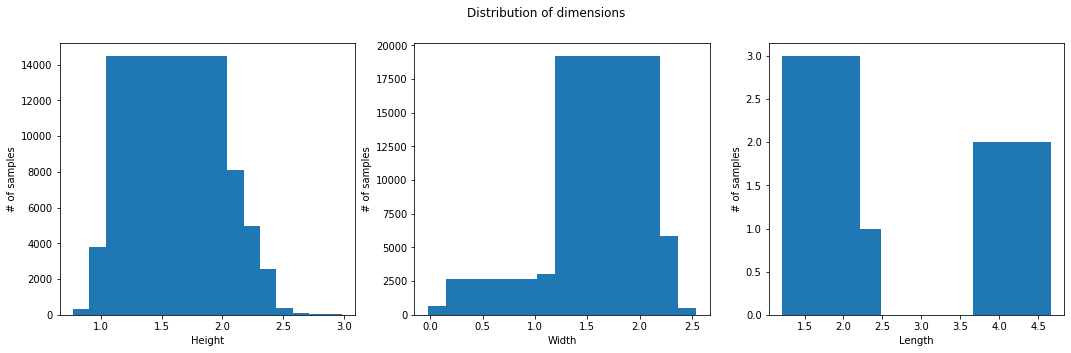

In [57]:
# Plot histogram of dimensions
dims = np.array(list(map(lambda record: record['dims'], kitti.image_data)))
heights, widths, lengths = dims[:, 0], dims[:, 1], dims[:2]
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
axes = axes.flatten()
fig.suptitle("Distribution of dimensions")
for i, (dim, dim_name) in enumerate(zip([heights, widths, lengths], ['Height', 'Width', 'Length'])):
    hist, bins = np.histogram(dim, bins = 10)
    axes[i].bar(bins[1:], hist, width = 1)
    axes[i].set_xlabel(dim_name)
    axes[i].set_ylabel("# of samples")
plt.show()